In [14]:
import pandas as pd
import joblib

In [4]:
df = pd.read_csv('../data/raw/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print('Before preprocessing:')
print(df.info())
print(df.describe())
print("Null values: ",df.isnull().sum())
print("Types: ",df.dtypes)

Before preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns: ", categorical_columns)
print("Numerical columns: ", numerical_columns)

Categorical columns:  ['ocean_proximity']
Numerical columns:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [8]:
# Null values handling
for col in numerical_columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print('After preprocessing:')
print("Null values: ",df.isnull().sum())

After preprocessing:
Null values:  longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [9]:
#Outlier handling
# Remove top 1% of median house value
df = df[df['median_house_value'] < df['median_house_value'].quantile(0.99)]

In [10]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print('After encoding categorical variables:')
print(df_encoded.info())
print("Types: \n",df_encoded.dtypes)

After encoding categorical variables:
<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19675 non-null  float64
 1   latitude                    19675 non-null  float64
 2   housing_median_age          19675 non-null  float64
 3   total_rooms                 19675 non-null  float64
 4   total_bedrooms              19675 non-null  float64
 5   population                  19675 non-null  float64
 6   households                  19675 non-null  float64
 7   median_income               19675 non-null  float64
 8   median_house_value          19675 non-null  float64
 9   ocean_proximity_INLAND      19675 non-null  bool   
 10  ocean_proximity_ISLAND      19675 non-null  bool   
 11  ocean_proximity_NEAR BAY    19675 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  19675 non-null  bool   
dty

In [11]:
# Separate features and target variable
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

In [13]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['median_house_value'] = y.values

In [15]:
# Save the processed data
df_scaled.to_csv('../data/processed/housing_processed.csv', index=False)
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

In [16]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (15740, 12)
Testing set shape:  (3935, 12)


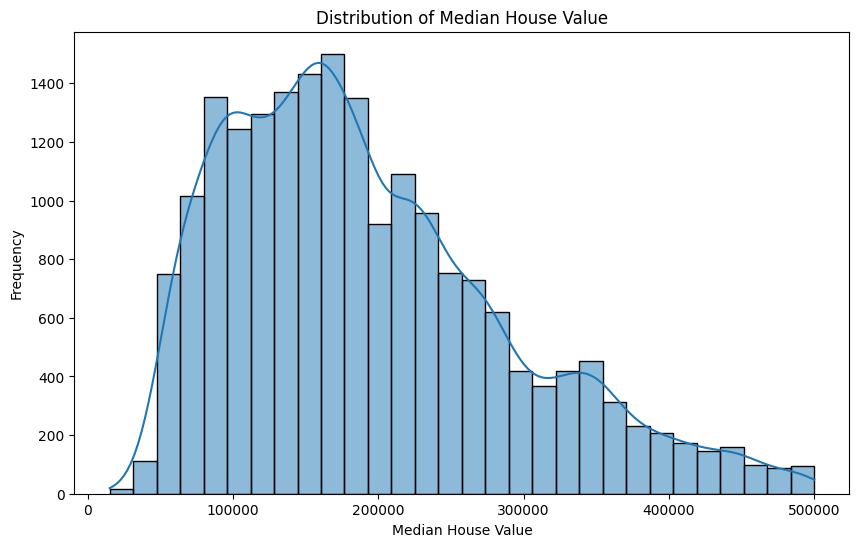

In [17]:
#Plot house prices distribution after preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.savefig('../results/median_house_value_distribution_postprocessed.png')
plt.show()

In [19]:
#The data after preprocessing
display(df_scaled.head())
display(df_scaled.describe())
display(df_scaled.info())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.329378,1.036503,1.008388,-0.797584,-0.977103,-0.978308,-0.978946,2.960380,-0.704332,-0.015943,2.896019,-0.376789,452600.0
1,-1.324393,1.027200,-0.590487,2.053478,1.347703,0.839604,1.661594,2.945223,-0.704332,-0.015943,2.896019,-0.376789,358500.0
2,-1.334362,1.022548,1.887770,-0.528477,-0.831952,-0.826159,-0.845876,2.280353,-0.704332,-0.015943,2.896019,-0.376789,352100.0
3,-1.339347,1.022548,1.887770,-0.616957,-0.724873,-0.771946,-0.736288,1.252288,-0.704332,-0.015943,2.896019,-0.376789,341300.0
4,-1.339347,1.022548,1.887770,-0.455126,-0.617793,-0.765825,-0.631919,0.107935,-0.704332,-0.015943,2.896019,-0.376789,342200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
count,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,19675.000000
mean,-8.343776e-15,-2.080166e-16,-1.213430e-16,6.789430e-17,-1.242321e-16,-2.455751e-17,2.889119e-17,1.733471e-17,2.253513e-16,8.306217e-18,1.791254e-16,-4.333679e-17,192477.921017
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,97711.509613
min,-2.386177e+00,-1.447510e+00,-2.189362e+00,-1.200097e+00,-1.279304e+00,-1.257247e+00,-1.302491e+00,-2.023152e+00,-7.043323e-01,-1.594347e-02,-3.453016e-01,-3.767890e-01,14999.000000
25%,-1.095087e+00,-8.009221e-01,-8.303180e-01,-5.417721e-01,-5.725823e-01,-5.638345e-01,-5.719066e-01,-7.323231e-01,-7.043323e-01,-1.594347e-02,-3.453016e-01,-3.767890e-01,116600.000000
50%,5.299910e-01,-6.427639e-01,-3.088043e-02,-2.332395e-01,-2.394472e-01,-2.289329e-01,-2.353160e-01,-1.443844e-01,-7.043323e-01,-1.594347e-02,-3.453016e-01,-3.767890e-01,173800.000000
75%,7.842210e-01,9.667277e-01,6.886133e-01,2.293302e-01,2.507372e-01,2.668613e-01,2.734837e-01,5.769104e-01,1.419784e+00,-1.594347e-02,-3.453016e-01,-3.767890e-01,248200.000000
max,2.618665e+00,2.929749e+00,1.887770e+00,1.682499e+01,1.405205e+01,2.994106e+01,1.456162e+01,7.211282e+00,1.419784e+00,6.272161e+01,2.896019e+00,2.654005e+00,500000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19675 entries, 0 to 19674
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19675 non-null  float64
 1   latitude                    19675 non-null  float64
 2   housing_median_age          19675 non-null  float64
 3   total_rooms                 19675 non-null  float64
 4   total_bedrooms              19675 non-null  float64
 5   population                  19675 non-null  float64
 6   households                  19675 non-null  float64
 7   median_income               19675 non-null  float64
 8   ocean_proximity_INLAND      19675 non-null  float64
 9   ocean_proximity_ISLAND      19675 non-null  float64
 10  ocean_proximity_NEAR BAY    19675 non-null  float64
 11  ocean_proximity_NEAR OCEAN  19675 non-null  float64
 12  median_house_value          19675 non-null  float64
dtypes: float64(13)
memory usage: 2.

None